In [1]:
import cvxpy as cp
import numpy as np

d = 5
K = 2
M = 1

w   = np.random.random(d)
c_0 = np.random.random(d)
c_1 = np.random.random(d)

us = [np.ones(K) for _ in range(M)]

In [6]:
# Construct the problem.
c = cp.Variable(5)
objective = cp.Maximize(w @ c)
constraints = [
    cp.norm(c - c_0, 2) <= 1,
]
prob = cp.Problem(objective, constraints)

In [7]:
# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(c.value)

[0.35920086 0.45874315 0.74245147 0.56634824 0.03915299]


In [2]:
import os 
import pickle 

gpu_trained_dir = "/home/yppatel/fusioncp/trained"
cpu_trained_dir = "/home/yppatel/fusioncp/trained_cpu"

for model_fn in os.listdir(gpu_trained_dir):
    print(f"Transferring {model_fn} to CPU...")
    with open(os.path.join(gpu_trained_dir, model_fn), "rb") as f:
        generative_model = pickle.load(f)
    generative_model.to("cpu")        

    with open(os.path.join(cpu_trained_dir, model_fn), "wb") as f:
        pickle.dump(generative_model, f)

Transferring gaussian_mixture_1-2.nf to CPU...
Transferring two_moons_0-1.nf to CPU...
Transferring two_moons_1-2.nf to CPU...
Transferring gaussian_mixture_0-1.nf to CPU...


In [ ]:
import sbibm

task_names = ["two_moons", "gaussian_mixture"]
tasks      = [sbibm.get_task(task_name) for task_name in task_names]
priors     = [task.get_prior() for task in tasks]
simulators = [task.get_simulator() for task in tasks]

In [3]:
import pickle

fn = "/home/yppatel/fusioncp/exp_configs/two_moons,gaussian_mixture"
with open(fn, "rb") as f:
    d = pickle.load(f)

In [10]:
d["x_test"].shape

torch.Size([100, 4])

In [2]:
import numpy as np

nominal = np.random.random(1_000)
robust1 = nominal * 3 + np.random.random(1_000)
robust2 = nominal * 1 + np.random.random(1_000)

In [3]:
diff1 = nominal - robust1
diff2 = nominal - robust2

In [19]:
trials = 1_000
subsample_size = 100
bootstrap_samples1 = np.array([np.mean(diff1[np.random.choice(1000, subsample_size)]) for _ in range(trials)])
bootstrap_samples2 = np.array([np.mean(diff2[np.random.choice(1000, subsample_size)]) for _ in range(trials)])

(array([  8.,  32.,  91., 193., 236., 233., 131.,  54.,  17.,   5.]),
 array([-1.69207455, -1.65218269, -1.61229083, -1.57239897, -1.53250712,
        -1.49261526, -1.4527234 , -1.41283154, -1.37293969, -1.33304783,
        -1.29315597]),
 <BarContainer object of 10 artists>)

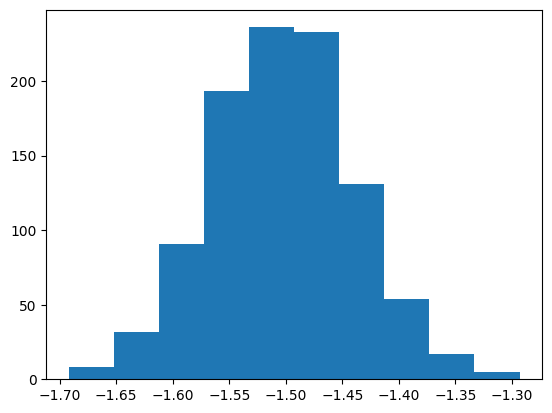

In [20]:
import matplotlib.pyplot as plt
plt.hist(bootstrap_samples1)

In [5]:
np.mean(diff2) / np.std(diff2)

-1.733671078425203